In [2]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '../bigdata anlysis II/src/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

# Step1. 탐색: 데이터의 기초 정보 살펴보기

#### * drinks 데이터셋의 기초정보 출력하기

In [3]:
import pandas as pd
file_path = "data/drinks.csv"
drinks = pd.read_csv(file_path, sep ='\t')
print(drinks.info())
drinks.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 1 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent  193 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB
None


,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,AS"
1,"Albania,89,132,54,4.9,EU"
2,"Algeria,25,0,14,0.7,AF"
3,"Andorra,245,138,312,12.4,EU"
4,"Angola,217,57,45,5.9,AF"


- 책에 주어진 데이터 프레임과 데이터로 현재 데이터프레임이 일치하지 않아  
맞추는 수정작업이 필요하다.

In [4]:
cols = str(drinks.columns[0])
cols = cols.split(',')
cols

['country',
 'beer_servings',
 'spirit_servings',
 'wine_servings',
 'total_litres_of_pure_alcohol',
 'continent']

In [5]:
new_drinks = pd.DataFrame(columns=cols)
for i in range(len(drinks)):
     new_drinks.loc[i] = str(drinks.loc[i][0]).split(",")
new_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [6]:
# 데이터프레임 생성 후 한 줄씩 추가하는 방법
df4 = pd.DataFrame(columns=("i1", "i2", "i3"))
for i in range(3):
    df4.loc[i] = [(i + 1) * (n + 1) for n in range(3)]
print(df4); print()
    
# 여러 컬럼을 가진 데이터프레임 한 번에 생성하는 방법
df2 = pd.DataFrame({"c1": [1, 2, 3], "c2": [11, 22, 33], "c3": [111, 222, 333]}, index=["i1", "i2", "i3"])
print(df2)

  i1 i2 i3
0  1  2  3
1  2  4  6
2  3  6  9

    c1  c2   c3
i1   1  11  111
i2   2  22  222
i3   3  33  333


In [7]:
drinks = new_drinks
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country                       193 non-null    object
 1   beer_servings                 193 non-null    object
 2   spirit_servings               193 non-null    object
 3   wine_servings                 193 non-null    object
 4   total_litres_of_pure_alcohol  193 non-null    object
 5   continent                     193 non-null    object
dtypes: object(6)
memory usage: 10.6+ KB


In [8]:
# Dtype 바꾸기
# beer_servings, spirit_servings, wine_servings -> int64
# total_litres_of_pure_alcohol  -> float64
cols = ['beer_servings', 'spirit_servings', 'wine_servings']
for col in cols:
    drinks = drinks.astype({col: 'int64'})

col = 'total_litres_of_pure_alcohol'
drinks = drinks.astype({col: 'float'})
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 10.6+ KB


In [9]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# Step2. 인사이트의 발견: 탐색과 시각화하기

#### * 두 피처간 상관계수 구하기

In [10]:
#  pearson은 상관 계수를 구하는 계산 방법 중 하나로, 가장 널리 쓰이는 방법
corr  = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


#### * 여러 피처간 상관계수 분석하기

In [11]:
corr = drinks[drinks.columns].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


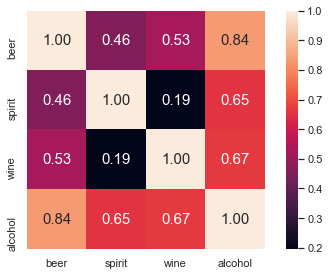

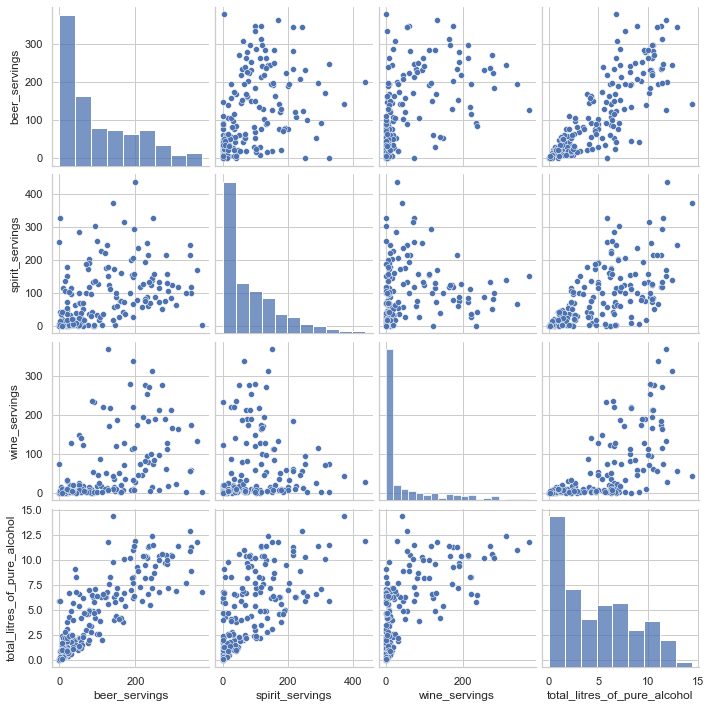

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.0)
hm = sns.heatmap(corr.values, 
                               cbar = True, 
                               annot = True,
                               square = True,
                               fmt = '.2f',
                               annot_kws = {'size': 15},
                               yticklabels = cols_view,
                               xticklabels = cols_view)

plt.tight_layout()
plt.show()

sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[drinks.columns], height = 2.5)
plt.show()

- total_litres_of_pure_alcohol 피처가 대체적으로 모든 피처와 상관관계가 있는 것으로 보아  
특히 beer_servings와 연관성이 많아보인다.

# Step3. 데이터 전처리: 전처리 함수 사용하기

#### * 결측데이터 전처리하기

In [12]:
#  책에서는 Nan(결측지)으로 되어있지만 지금 자료는 NA으로 되어있다. Other -> OT
# drinks['continent'] = drinks['continent'].fillna('OT')
drinks.replace('NA', 'OT', inplace=True)
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


#### * 전체 대륙 중에서 OT가 차지하는 비율을 파이차트로 시각화하기

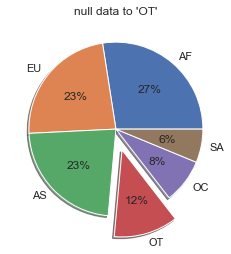

In [13]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

#### * agg() 함수를 이용해 대륙별 spirit_servings의 통계적 정보 분석하기

In [14]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


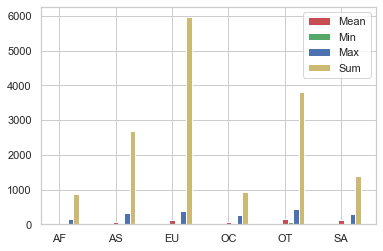

In [15]:
import numpy as np

n_grps = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_grps)
bar_width = 0.1

rt1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rt2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rt3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rt4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

#### * 전체 평균보다 많은 알고올을 섭취하는 대륙 구하기

In [16]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

Text(0.5, 1.0, '대륙별 total_litres_of_pure_alcohol')

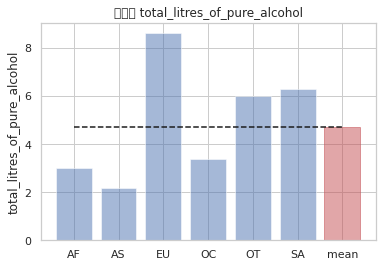

In [25]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[-1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('대륙별 total_litres_of_pure_alcohol')

#### * 평균 beer_servings가 가장 높은 대륙은 어디일까?

In [18]:
# beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax()
beer_continent = drinks.groupby('continent')['beer_servings'].mean()
print(beer_continent)
beer_continent.idxmax()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64


'EU'

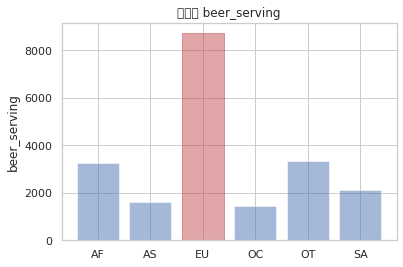

In [26]:
beer_sum = drinks.groupby('continent')['beer_servings'].sum() #평균이 아닌 합을 구함
continents = beer_sum.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_sum.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_serving')
plt.title('대륙별 beer_serving')

plt.show()

# Step4. 탐색적 분석: 스무고개로 개념적 탐색 분석하기 

In [13]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


#### * 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

In [15]:
drinks['continent'] == 'AF'

0      False
1      False
2       True
3      False
4       True
       ...  
188    False
189    False
190    False
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [17]:
africa = drinks.loc[drinks['continent'] == 'AF'] # loc[]: 행 조회
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
# 두 집단의 분산이 같은 경우로 가정
tT_eq_result = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) 
# 두 집단의 분산이 같지 않은 경우로 가정
tT_diff_result = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statisitc and p-value assuming equal variances is %.3f and %.3f" %tT_eq_result)
print("The t-statisitc and p-value assuming different variances is %.3f and %.3f" %tT_diff_result)

The t-statisitc and p-value assuming equal variances is -7.268 and 0.000
The t-statisitc and p-value assuming different variances is -7.144 and 0.000


- 등분산을 가정한 경우와 가정하지 않은 경우 모두 p-value가 0.000이하로 나타났다.
- 따라서 귀무가설:두 집단의 평균이 같다 -> 기각 -> 아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미하다.  

  
=> 그렇지만 여기 두 집단의 데이터 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정으로   보기는 어렵다.

#### * '대한민국은 얼마나 술을 독하게 마시는 나라일까' 탐색하기

In [21]:
# 모든 술을 포함한 총 소비량 feature 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

# 알코올 / 술 소비량 => 술 소비량 대비 알코올 비율
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'] .fillna(0)

cntry_rnk = drinks[['country', 'alcohol_rate']]
cntry_rnk = cntry_rnk.sort_values(by=['alcohol_rate'], ascending=0)
cntry_rnk.head(15)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


#### * 국가별 술 소비량 대비 알코올 비율을 순위별로 시각화하기

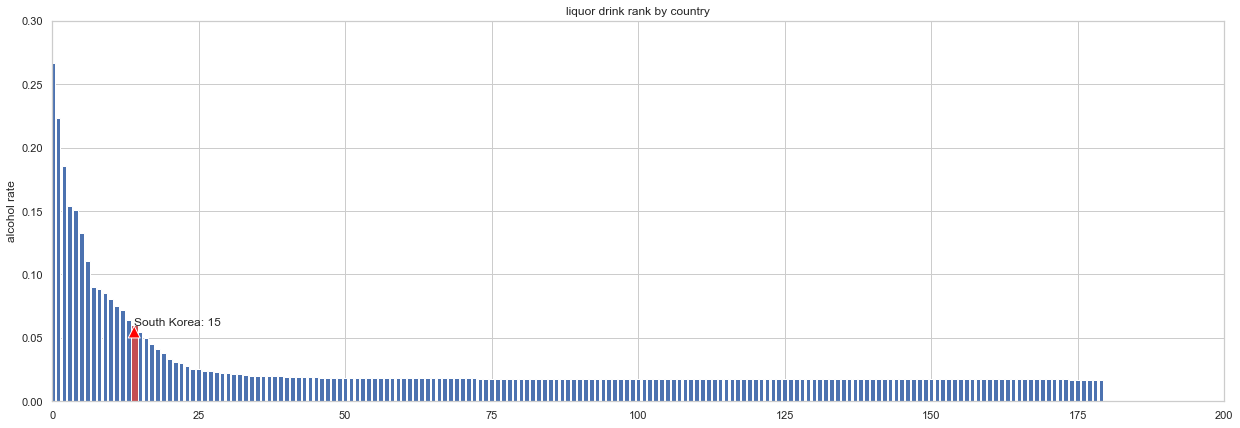

In [59]:
import numpy as np

cntry_lst = cntry_rnk.country.tolist()
x_pos = np.arange(len(cntry_lst))
rank = cntry_rnk.alcohol_rate.tolist()

plt.figure(figsize=(21, 7))
bar_list = plt.bar(x_pos, rank)
bar_list[cntry_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')

korea_rank = cntry_lst.index('South Korea')
korea_alc_rate = cntry_rnk[cntry_rnk['country'] == 'South Korea']['alcohol_rate'].values[0] # array([0.059xxx])
plt.annotate('South Korea: ' + str(korea_rank + 1), xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank, korea_alc_rate), arrowprops = dict(facecolor='red'))
# xytext: 화살표 시작점, xy: 화살표 도착점

plt.axis([0, 200, 0, 0.3])
plt.show()